<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Clustering_Music.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/mount')

Mounted at /content/mount


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import cluster
sns.set()

In [3]:
data = pd.read_csv('/content/mount/MyDrive/Colab Notebooks/Spotify-2000.csv')
data.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [4]:
data = data.drop("Index", axis = 1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   1994 non-null   object
 1   Artist                  1994 non-null   object
 2   Top Genre               1994 non-null   object
 3   Year                    1994 non-null   int64 
 4   Beats Per Minute (BPM)  1994 non-null   int64 
 5   Energy                  1994 non-null   int64 
 6   Danceability            1994 non-null   int64 
 7   Loudness (dB)           1994 non-null   int64 
 8   Liveness                1994 non-null   int64 
 9   Valence                 1994 non-null   int64 
 10  Length (Duration)       1994 non-null   object
 11  Acousticness            1994 non-null   int64 
 12  Speechiness             1994 non-null   int64 
 13  Popularity              1994 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 218.2+ KB


In [6]:
data.shape

(1994, 14)

Text(0.5, 1.0, 'Correlation between columns')

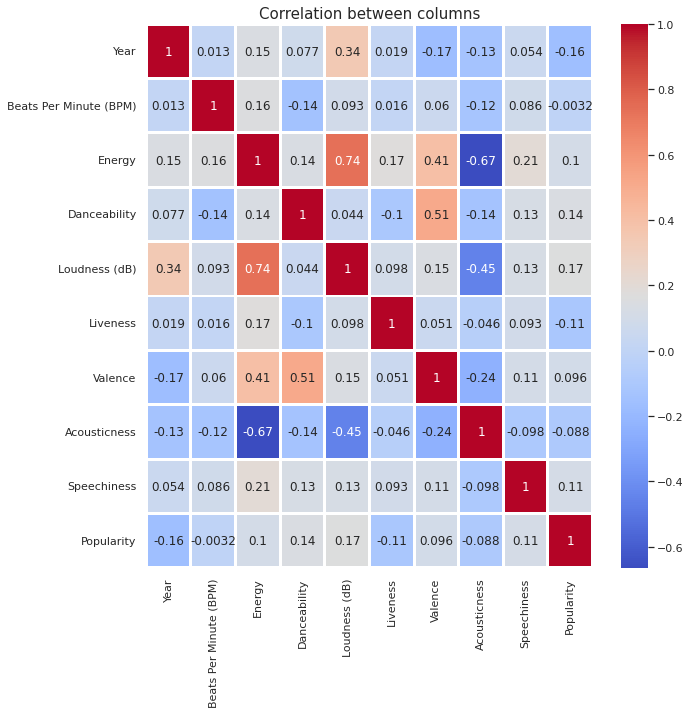

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), cmap="coolwarm", linewidths=2, linecolor="white", annot=True)
plt.title("Correlation between columns", fontsize=15)

In [8]:
year = data.groupby(['Year'])['Valence'].count()
year

Year
1956     1
1958     5
1959     3
1960     1
1961     1
        ..
2015    42
2016    35
2017    45
2018    52
2019    21
Name: Valence, Length: 63, dtype: int64

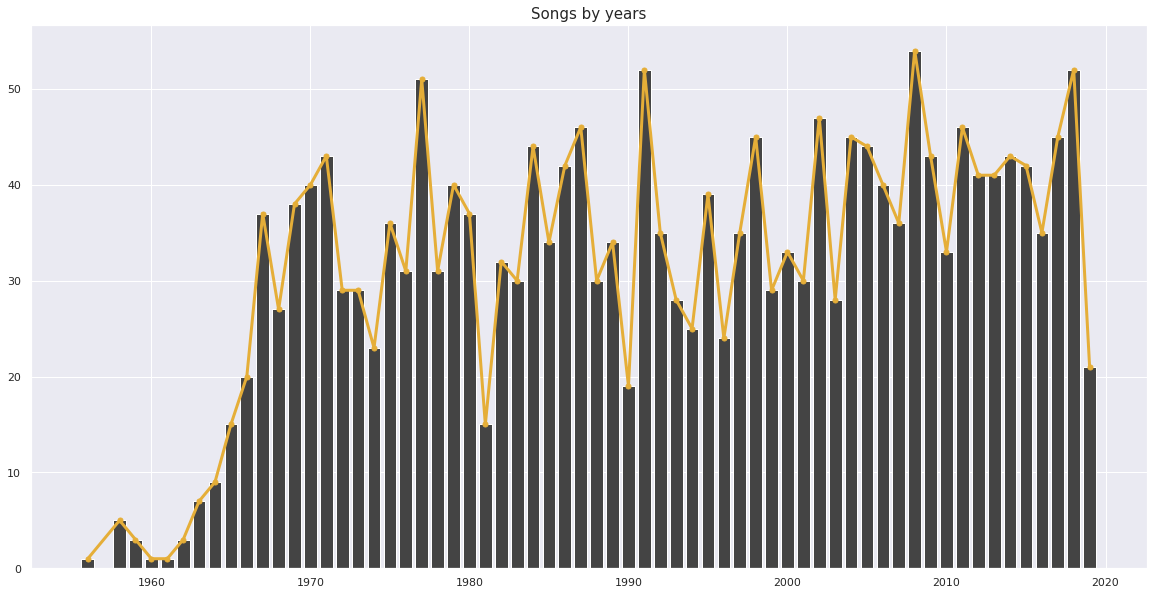

In [9]:
plt.figure(figsize=(20,10))
plt.bar(x=year.index, height=year.values, color = "#444444")
plt.plot(year.index, year.values, color="#e5ae38", linewidth=3, markersize=5, marker='o')
plt.title("Songs by years", fontsize=15)
plt.show()

In [11]:
data2 = data[["Beats Per Minute (BPM)", "Loudness (dB)", 
              "Liveness", "Valence", "Acousticness", 
              "Speechiness"]]

from sklearn.preprocessing import MinMaxScaler 
for i in data.columns:
  MinMaxScaler(i)

from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(data2)  

In [12]:
data["Music Segments"] = clusters 
MinMaxScaler(data["Music Segments"]) 
data["Music Segments"] = data["Music Segments"].map({1: "Cluster 1", 2: 
    "Cluster 2", 3: "Cluster 3", 4: "Cluster 4", 5: "Cluster 5", 
    6: "Cluster 6", 7: "Cluster 7", 8: "Cluster 8", 
    9: "Cluster 9", 10: "Cluster 10"})

In [13]:
data.head()

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,Music Segments
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,Cluster 2
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39,Cluster 9
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69,Cluster 4
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76,Cluster 4
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59,Cluster 3


In [14]:
import plotly.graph_objects as go
PLOT = go.Figure()
for i in list(data["Music Segments"].unique()):
    

    PLOT.add_trace(go.Scatter3d(x = data[data["Music Segments"]== i]['Beats Per Minute (BPM)'],
                                y = data[data["Music Segments"] == i]['Energy'],
                                z = data[data["Music Segments"] == i]['Danceability'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='Beats Per Minute (BPM): %{x} <br>Energy: %{y} <br>Danceability: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Beats Per Minute (BPM)', titlefont_color = 'black'),
                                yaxis=dict(title = 'Energy', titlefont_color = 'black'),
                                zaxis=dict(title = 'Danceability', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))